In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import copy
import random as rd
import pickle
import matplotlib.pyplot as plt

# Data Pre-processing

## Census Tracts

<AxesSubplot:>

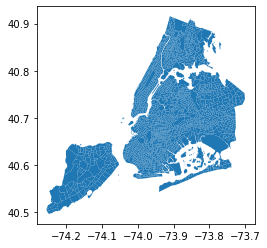

In [4]:
area_gpd = gpd.read_file('2010 Census Tracts/geo_export_3587ea98-2925-456b-a389-ecb51ad1a719.shp')
area_gpd.plot()

## ACS Data - Age 67+

In [3]:
count_data = 1
z = 1.645 # 90%

################################################################

df = pd.read_csv("B01001_36.csv")

col = ['67 to 69 years', '70 to 74 years', '75 to 79 years',
       '80 to 84 years', '85 years and over']
geoid_uni = np.unique(np.array(df['GEOID']))
whole_data = []
for i in geoid_uni:
    df_gid = df.loc[df['GEOID'] == i]
    df_gid_eld = pd.DataFrame(columns=df_gid.columns)
    for cc in col:
        aaa = df_gid.loc[df_gid['TITLE'] == cc]
        df_gid_eld = df_gid_eld.append(aaa)
    
    
    data = []
    data.append(i)
    ## Estimate
    est_array = np.array(df_gid_eld['ESTIMATE'])
    estimate = sum(est_array)
    if count_data == 0:
        estimate = estimate/len(est_array)
    data.append(estimate)
    
    drop_col = ['TBLID', 'GEOID', 'NAME', 'ORDER', 'TITLE', 
                'ESTIMATE', 'MOE', 'CME', 'SE']
    vrt = copy.deepcopy(df_gid_eld)
    vrt = vrt.drop(drop_col, axis = 1)
    data_vrt = vrt.to_numpy()
    ## MOE
    vr_data_sum = np.zeros((1,len(data_vrt[0])))
    m = 0
    for ind_i in range(len(data_vrt)):
        vr_data_sum = vr_data_sum + data_vrt[ind_i]
    if count_data == 0:
        vr_data_sum = vr_data_sum/len(data_vrt)
    MOE = z*np.std(vr_data_sum)
    data.append(MOE)
    
    ## Var_Rep1-80
    vr_sum = list(sum(data_vrt,0))
    for iii in vr_sum:
        data.append(iii)
    
    whole_data.append(data)

data_eld_fin = pd.DataFrame(whole_data, columns=['GEOID', 'ESTIMATE', 'MOE', 'Var_Rep1', 'Var_Rep2', 'Var_Rep3', 'Var_Rep4', 'Var_Rep5',
       'Var_Rep6', 'Var_Rep7', 'Var_Rep8', 'Var_Rep9', 'Var_Rep10',
       'Var_Rep11', 'Var_Rep12', 'Var_Rep13', 'Var_Rep14', 'Var_Rep15',
       'Var_Rep16', 'Var_Rep17', 'Var_Rep18', 'Var_Rep19', 'Var_Rep20',
       'Var_Rep21', 'Var_Rep22', 'Var_Rep23', 'Var_Rep24', 'Var_Rep25',
       'Var_Rep26', 'Var_Rep27', 'Var_Rep28', 'Var_Rep29', 'Var_Rep30',
       'Var_Rep31', 'Var_Rep32', 'Var_Rep33', 'Var_Rep34', 'Var_Rep35',
       'Var_Rep36', 'Var_Rep37', 'Var_Rep38', 'Var_Rep39', 'Var_Rep40',
       'Var_Rep41', 'Var_Rep42', 'Var_Rep43', 'Var_Rep44', 'Var_Rep45',
       'Var_Rep46', 'Var_Rep47', 'Var_Rep48', 'Var_Rep49', 'Var_Rep50',
       'Var_Rep51', 'Var_Rep52', 'Var_Rep53', 'Var_Rep54', 'Var_Rep55',
       'Var_Rep56', 'Var_Rep57', 'Var_Rep58', 'Var_Rep59', 'Var_Rep60',
       'Var_Rep61', 'Var_Rep62', 'Var_Rep63', 'Var_Rep64', 'Var_Rep65',
       'Var_Rep66', 'Var_Rep67', 'Var_Rep68', 'Var_Rep69', 'Var_Rep70',
       'Var_Rep71', 'Var_Rep72', 'Var_Rep73', 'Var_Rep74', 'Var_Rep75',
       'Var_Rep76', 'Var_Rep77', 'Var_Rep78', 'Var_Rep79', 'Var_Rep80'])

old_columns = data_eld_fin.columns
new_columns = [i if i=='GEOID' else i+"_1" for i in old_columns]
data_eld_fin.columns = new_columns
data_eld_fin


,GEOID,ESTIMATE_1,MOE_1,Var_Rep1_1,Var_Rep2_1,Var_Rep3_1,Var_Rep4_1,Var_Rep5_1,Var_Rep6_1,Var_Rep7_1,...,Var_Rep71_1,Var_Rep72_1,Var_Rep73_1,Var_Rep74_1,Var_Rep75_1,Var_Rep76_1,Var_Rep77_1,Var_Rep78_1,Var_Rep79_1,Var_Rep80_1
0,14000US36001000100,173,28.886002,157,158,172,144,188,156,139,...,162,191,176,170,164,182,184,171,159,177
1,14000US36001000200,268,56.620628,316,223,288,255,249,206,253,...,242,238,265,233,253,261,236,292,309,263
2,14000US36001000300,889,131.114182,943,945,957,887,912,803,950,...,828,773,724,1061,926,877,841,909,751,998
3,14000US36001000401,1051,93.557104,1071,948,1014,1154,1125,1034,966,...,1130,1001,989,1025,1004,1064,946,991,1037,955
4,14000US36001000403,657,82.371958,547,697,722,629,635,783,697,...,635,631,588,653,708,638,639,707,654,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,1155,88.463151,1069,1089,1112,1179,1144,1170,1179,...,1206,1168,1145,1134,1055,1125,1130,1151,1187,1173
4914,14000US36123150200,1016,67.919976,1043,956,1064,963,1084,1042,968,...,982,991,984,999,1056,958,1030,1002,981,1030
4915,14000US36123150300,722,45.950075,744,792,668,724,732,725,702,...,727,732,762,724,698,714,730,754,768,768
4916,14000US36123150400,607,68.720158,582,589,664,661,568,623,668,...,694,645,553,724,627,650,707,631,543,662


In [24]:
data_eld_fin_save = data_eld_fin.rename(columns={"ESTIMATE_1": "Age67+", 
                      "MOE_1": "MOE"})

old_columns = data_eld_fin_save.columns
new_columns = []
for i in old_columns:
    if i[0:3]=='Var':
        new_columns.append(i[0:-2])
    else:
        new_columns.append(i)

data_eld_fin_save.columns = new_columns

data_eld_fin_save.to_csv('data_elderly.csv')

data_eld_fin_save



,GEOID,Age67+,MOE,Var_Rep1,Var_Rep2,Var_Rep3,Var_Rep4,Var_Rep5,Var_Rep6,Var_Rep7,...,Var_Rep71,Var_Rep72,Var_Rep73,Var_Rep74,Var_Rep75,Var_Rep76,Var_Rep77,Var_Rep78,Var_Rep79,Var_Rep80
0,14000US36001000100,173,28.886002,157,158,172,144,188,156,139,...,162,191,176,170,164,182,184,171,159,177
1,14000US36001000200,268,56.620628,316,223,288,255,249,206,253,...,242,238,265,233,253,261,236,292,309,263
2,14000US36001000300,889,131.114182,943,945,957,887,912,803,950,...,828,773,724,1061,926,877,841,909,751,998
3,14000US36001000401,1051,93.557104,1071,948,1014,1154,1125,1034,966,...,1130,1001,989,1025,1004,1064,946,991,1037,955
4,14000US36001000403,657,82.371958,547,697,722,629,635,783,697,...,635,631,588,653,708,638,639,707,654,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,1155,88.463151,1069,1089,1112,1179,1144,1170,1179,...,1206,1168,1145,1134,1055,1125,1130,1151,1187,1173
4914,14000US36123150200,1016,67.919976,1043,956,1064,963,1084,1042,968,...,982,991,984,999,1056,958,1030,1002,981,1030
4915,14000US36123150300,722,45.950075,744,792,668,724,732,725,702,...,727,732,762,724,698,714,730,754,768,768
4916,14000US36123150400,607,68.720158,582,589,664,661,568,623,668,...,694,645,553,724,627,650,707,631,543,662


## ACS Data - with a disability

In [4]:
df = pd.read_csv("B18101_36.csv")
count_data = 1
z = 1.645 # 90%

geoid_uni = np.unique(np.array(df['GEOID']))
whole_data = []

for i in geoid_uni:
    df_gid = df.loc[df['GEOID'] == i]
    df_gid_dis = df_gid.loc[df['TITLE'] == "With a disability"]
    
    data = []
    data.append(i)
    ## Estimate
    est_array = np.array(df_gid_dis['ESTIMATE'])
    estimate = sum(est_array)
    data.append(estimate)
    
    drop_col = ['TBLID', 'GEOID', 'NAME', 'ORDER', 'TITLE', 
                'ESTIMATE', 'MOE', 'CME', 'SE']
    vrt = copy.deepcopy(df_gid_dis)
    vrt = vrt.drop(drop_col, axis = 1)
    data_vrt = vrt.to_numpy()
    ## MOE
    vr_data_sum = np.zeros((1,len(data_vrt[0])))
    m = 0
    for ind_i in range(len(data_vrt)):
        vr_data_sum = vr_data_sum + data_vrt[ind_i]
    if count_data == 0:
        vr_data_sum = vr_data_sum/len(data_vrt)
    MOE = z*np.std(vr_data_sum)
    data.append(MOE)
    
    ## Var_Rep1-80
    vr_sum = list(sum(data_vrt,0))
    for iii in vr_sum:
        data.append(iii)
    
    whole_data.append(data)
    
data_dis_fin = pd.DataFrame(whole_data, columns=['GEOID', 'ESTIMATE', 'MOE', 'Var_Rep1', 'Var_Rep2', 'Var_Rep3', 'Var_Rep4', 'Var_Rep5',
       'Var_Rep6', 'Var_Rep7', 'Var_Rep8', 'Var_Rep9', 'Var_Rep10',
       'Var_Rep11', 'Var_Rep12', 'Var_Rep13', 'Var_Rep14', 'Var_Rep15',
       'Var_Rep16', 'Var_Rep17', 'Var_Rep18', 'Var_Rep19', 'Var_Rep20',
       'Var_Rep21', 'Var_Rep22', 'Var_Rep23', 'Var_Rep24', 'Var_Rep25',
       'Var_Rep26', 'Var_Rep27', 'Var_Rep28', 'Var_Rep29', 'Var_Rep30',
       'Var_Rep31', 'Var_Rep32', 'Var_Rep33', 'Var_Rep34', 'Var_Rep35',
       'Var_Rep36', 'Var_Rep37', 'Var_Rep38', 'Var_Rep39', 'Var_Rep40',
       'Var_Rep41', 'Var_Rep42', 'Var_Rep43', 'Var_Rep44', 'Var_Rep45',
       'Var_Rep46', 'Var_Rep47', 'Var_Rep48', 'Var_Rep49', 'Var_Rep50',
       'Var_Rep51', 'Var_Rep52', 'Var_Rep53', 'Var_Rep54', 'Var_Rep55',
       'Var_Rep56', 'Var_Rep57', 'Var_Rep58', 'Var_Rep59', 'Var_Rep60',
       'Var_Rep61', 'Var_Rep62', 'Var_Rep63', 'Var_Rep64', 'Var_Rep65',
       'Var_Rep66', 'Var_Rep67', 'Var_Rep68', 'Var_Rep69', 'Var_Rep70',
       'Var_Rep71', 'Var_Rep72', 'Var_Rep73', 'Var_Rep74', 'Var_Rep75',
       'Var_Rep76', 'Var_Rep77', 'Var_Rep78', 'Var_Rep79', 'Var_Rep80'])

old_columns = data_dis_fin.columns
new_columns = [i if i=='GEOID' else i+"_2" for i in old_columns]
data_dis_fin.columns = new_columns
data_dis_fin


,GEOID,ESTIMATE_2,MOE_2,Var_Rep1_2,Var_Rep2_2,Var_Rep3_2,Var_Rep4_2,Var_Rep5_2,Var_Rep6_2,Var_Rep7_2,...,Var_Rep71_2,Var_Rep72_2,Var_Rep73_2,Var_Rep74_2,Var_Rep75_2,Var_Rep76_2,Var_Rep77_2,Var_Rep78_2,Var_Rep79_2,Var_Rep80_2
0,14000US36001000100,357,61.607927,389,398,346,334,450,371,286,...,403,364,339,344,339,323,358,385,378,384
1,14000US36001000200,516,90.665834,491,464,547,555,566,472,476,...,406,521,542,539,452,548,589,475,624,551
2,14000US36001000300,954,161.423876,1086,948,897,705,836,1053,862,...,995,921,806,1019,933,1010,1049,918,952,947
3,14000US36001000401,489,110.137357,462,390,327,474,514,588,529,...,542,471,443,402,431,536,455,456,498,521
4,14000US36001000403,462,103.694694,432,556,571,403,517,453,478,...,569,456,359,485,528,528,551,440,531,463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,780,93.643485,841,724,904,728,702,787,806,...,782,786,835,801,724,782,713,856,856,767
4914,14000US36123150200,568,71.377265,602,494,554,608,573,521,633,...,549,566,562,551,610,585,567,568,496,581
4915,14000US36123150300,550,56.150296,555,586,530,596,567,532,465,...,533,570,535,620,487,537,561,509,603,566
4916,14000US36123150400,396,53.704133,408,403,395,356,367,345,402,...,401,393,418,421,383,401,404,433,445,380


In [25]:
data_dis_fin_save = data_dis_fin.rename(columns={"ESTIMATE_2": "Disabled", 
                      "MOE_2": "MOE"})

old_columns = data_dis_fin_save.columns
new_columns = []
for i in old_columns:
    if i[0:3]=='Var':
        new_columns.append(i[0:-2])
    else:
        new_columns.append(i)

data_dis_fin_save.columns = new_columns

data_dis_fin_save.to_csv('data_disabled.csv')

data_dis_fin_save


,GEOID,Disabled,MOE,Var_Rep1,Var_Rep2,Var_Rep3,Var_Rep4,Var_Rep5,Var_Rep6,Var_Rep7,...,Var_Rep71,Var_Rep72,Var_Rep73,Var_Rep74,Var_Rep75,Var_Rep76,Var_Rep77,Var_Rep78,Var_Rep79,Var_Rep80
0,14000US36001000100,357,61.607927,389,398,346,334,450,371,286,...,403,364,339,344,339,323,358,385,378,384
1,14000US36001000200,516,90.665834,491,464,547,555,566,472,476,...,406,521,542,539,452,548,589,475,624,551
2,14000US36001000300,954,161.423876,1086,948,897,705,836,1053,862,...,995,921,806,1019,933,1010,1049,918,952,947
3,14000US36001000401,489,110.137357,462,390,327,474,514,588,529,...,542,471,443,402,431,536,455,456,498,521
4,14000US36001000403,462,103.694694,432,556,571,403,517,453,478,...,569,456,359,485,528,528,551,440,531,463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,780,93.643485,841,724,904,728,702,787,806,...,782,786,835,801,724,782,713,856,856,767
4914,14000US36123150200,568,71.377265,602,494,554,608,573,521,633,...,549,566,562,551,610,585,567,568,496,581
4915,14000US36123150300,550,56.150296,555,586,530,596,567,532,465,...,533,570,535,620,487,537,561,509,603,566
4916,14000US36123150400,396,53.704133,408,403,395,356,367,345,402,...,401,393,418,421,383,401,404,433,445,380


## ACS Data - below poverty

In [5]:
count_data = 1
z = 1.645 # 90%

################################################################


df = pd.read_csv("B17001_36.csv")

geoid_uni = list(np.unique(np.array(df['GEOID'])))
whole_data = []

for i in geoid_uni:
    df_gid = df.loc[df['GEOID'] == i]
    aaa = df_gid.loc[df['TITLE'] == "Income in the past 12 months below poverty level:"]
    
    
    data = []
    data.append(i)
    
    ## Estimate
    estimate = list(aaa['ESTIMATE'])[0]
    data.append(estimate)
    
    
    ## MOE
    moe = list(aaa['MOE'])[0]
    data.append(moe)
    
    
    #VRT
    drop_col = ['TBLID', 'GEOID', 'NAME', 'ORDER', 'TITLE', 
                'ESTIMATE', 'MOE', 'CME', 'SE']
    vrt = copy.deepcopy(aaa)
    vrt = vrt.drop(drop_col, axis = 1)
    data_vrt = vrt.to_numpy()[0]
    for iii in range(len(data_vrt)):
        data.append(data_vrt[iii])
        
    whole_data.append(data)
    
data_pov_fin = pd.DataFrame(whole_data, columns=['GEOID', 'ESTIMATE', 'MOE', 'Var_Rep1', 'Var_Rep2', 'Var_Rep3', 'Var_Rep4', 'Var_Rep5',
       'Var_Rep6', 'Var_Rep7', 'Var_Rep8', 'Var_Rep9', 'Var_Rep10',
       'Var_Rep11', 'Var_Rep12', 'Var_Rep13', 'Var_Rep14', 'Var_Rep15',
       'Var_Rep16', 'Var_Rep17', 'Var_Rep18', 'Var_Rep19', 'Var_Rep20',
       'Var_Rep21', 'Var_Rep22', 'Var_Rep23', 'Var_Rep24', 'Var_Rep25',
       'Var_Rep26', 'Var_Rep27', 'Var_Rep28', 'Var_Rep29', 'Var_Rep30',
       'Var_Rep31', 'Var_Rep32', 'Var_Rep33', 'Var_Rep34', 'Var_Rep35',
       'Var_Rep36', 'Var_Rep37', 'Var_Rep38', 'Var_Rep39', 'Var_Rep40',
       'Var_Rep41', 'Var_Rep42', 'Var_Rep43', 'Var_Rep44', 'Var_Rep45',
       'Var_Rep46', 'Var_Rep47', 'Var_Rep48', 'Var_Rep49', 'Var_Rep50',
       'Var_Rep51', 'Var_Rep52', 'Var_Rep53', 'Var_Rep54', 'Var_Rep55',
       'Var_Rep56', 'Var_Rep57', 'Var_Rep58', 'Var_Rep59', 'Var_Rep60',
       'Var_Rep61', 'Var_Rep62', 'Var_Rep63', 'Var_Rep64', 'Var_Rep65',
       'Var_Rep66', 'Var_Rep67', 'Var_Rep68', 'Var_Rep69', 'Var_Rep70',
       'Var_Rep71', 'Var_Rep72', 'Var_Rep73', 'Var_Rep74', 'Var_Rep75',
       'Var_Rep76', 'Var_Rep77', 'Var_Rep78', 'Var_Rep79', 'Var_Rep80'])

old_columns = data_pov_fin.columns
new_columns = [i if i=='GEOID' else i+"_3" for i in old_columns]
data_pov_fin.columns = new_columns
data_pov_fin 


,GEOID,ESTIMATE_3,MOE_3,Var_Rep1_3,Var_Rep2_3,Var_Rep3_3,Var_Rep4_3,Var_Rep5_3,Var_Rep6_3,Var_Rep7_3,...,Var_Rep71_3,Var_Rep72_3,Var_Rep73_3,Var_Rep74_3,Var_Rep75_3,Var_Rep76_3,Var_Rep77_3,Var_Rep78_3,Var_Rep79_3,Var_Rep80_3
0,14000US36001000100,502,231,422,583,512,555,628,504,604,...,510,489,548,609,439,432,549,332,485,300
1,14000US36001000200,1641,538,1350,1518,1798,1742,1798,1627,1810,...,1784,1705,1536,1812,1892,1781,1956,1576,1713,1582
2,14000US36001000300,1359,690,1277,1415,1586,1035,1706,1190,1272,...,1314,1021,1470,1505,1624,1458,1034,1283,1533,1080
3,14000US36001000401,168,88,186,154,148,138,193,164,159,...,210,157,91,135,143,189,155,145,149,220
4,14000US36001000403,456,260,547,512,504,318,413,461,537,...,470,335,307,566,553,475,491,468,499,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,1124,410,1185,954,1341,1059,1201,1149,883,...,1101,1234,1094,1122,1225,1109,1229,1101,1317,1118
4914,14000US36123150200,441,140,433,429,432,368,464,385,428,...,386,499,436,383,459,514,407,471,375,457
4915,14000US36123150300,622,185,600,624,667,677,687,577,566,...,582,604,634,720,570,616,775,548,528,592
4916,14000US36123150400,216,111,312,238,219,271,199,202,228,...,235,177,166,211,248,186,234,248,173,151


In [26]:
data_pov_fin_save = data_pov_fin.rename(columns={"ESTIMATE_3": "Below_poverty", 
                      "MOE_3": "MOE"})

old_columns = data_pov_fin_save.columns
new_columns = []
for i in old_columns:
    if i[0:3]=='Var':
        new_columns.append(i[0:-2])
    else:
        new_columns.append(i)

data_pov_fin_save.columns = new_columns

data_pov_fin_save.to_csv('data_below_poverty.csv')

data_pov_fin_save


,GEOID,Below_poverty,MOE,Var_Rep1,Var_Rep2,Var_Rep3,Var_Rep4,Var_Rep5,Var_Rep6,Var_Rep7,...,Var_Rep71,Var_Rep72,Var_Rep73,Var_Rep74,Var_Rep75,Var_Rep76,Var_Rep77,Var_Rep78,Var_Rep79,Var_Rep80
0,14000US36001000100,502,231,422,583,512,555,628,504,604,...,510,489,548,609,439,432,549,332,485,300
1,14000US36001000200,1641,538,1350,1518,1798,1742,1798,1627,1810,...,1784,1705,1536,1812,1892,1781,1956,1576,1713,1582
2,14000US36001000300,1359,690,1277,1415,1586,1035,1706,1190,1272,...,1314,1021,1470,1505,1624,1458,1034,1283,1533,1080
3,14000US36001000401,168,88,186,154,148,138,193,164,159,...,210,157,91,135,143,189,155,145,149,220
4,14000US36001000403,456,260,547,512,504,318,413,461,537,...,470,335,307,566,553,475,491,468,499,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,1124,410,1185,954,1341,1059,1201,1149,883,...,1101,1234,1094,1122,1225,1109,1229,1101,1317,1118
4914,14000US36123150200,441,140,433,429,432,368,464,385,428,...,386,499,436,383,459,514,407,471,375,457
4915,14000US36123150300,622,185,600,624,667,677,687,577,566,...,582,604,634,720,570,616,775,548,528,592
4916,14000US36123150400,216,111,312,238,219,271,199,202,228,...,235,177,166,211,248,186,234,248,173,151


## ACS - Commute>1h

In [6]:
count_data = 1
z = 1.645 # 90%

################################################################

df = pd.read_csv("B08303_36.csv")

col = ['60 to 89 minutes', '90 or more minutes']
geoid_uni = np.unique(np.array(df['GEOID']))
whole_data = []
for i in geoid_uni:
    df_gid = df.loc[df['GEOID'] == i]
    df_gid_1h = pd.DataFrame(columns=df_gid.columns)
    for cc in col:
        aaa = df_gid.loc[df_gid['TITLE'] == cc]
        df_gid_1h = df_gid_1h.append(aaa)
    
    
    data = []
    data.append(i)
    ## Estimate
    est_array = np.array(df_gid_1h['ESTIMATE'])
    estimate = sum(est_array)
    if count_data == 0:
        estimate = estimate/len(est_array)
    data.append(estimate)
    
    drop_col = ['TBLID', 'GEOID', 'NAME', 'ORDER', 'TITLE', 
                'ESTIMATE', 'MOE', 'CME', 'SE']
    vrt = copy.deepcopy(df_gid_1h)
    vrt = vrt.drop(drop_col, axis = 1)
    data_vrt = vrt.to_numpy()
    ## MOE
    vr_data_sum = np.zeros((1,len(data_vrt[0])))
    m = 0
    for ind_i in range(len(data_vrt)):
        vr_data_sum = vr_data_sum + data_vrt[ind_i]
    if count_data == 0:
        vr_data_sum = vr_data_sum/len(data_vrt)
    MOE = z*np.std(vr_data_sum)
    data.append(MOE)
    
    ## Var_Rep1-80
    vr_sum = list(sum(data_vrt,0))
    for iii in vr_sum:
        data.append(iii)
    
    whole_data.append(data)

data_1h_fin = pd.DataFrame(whole_data, columns=['GEOID', 'ESTIMATE', 'MOE', 'Var_Rep1', 'Var_Rep2', 'Var_Rep3', 'Var_Rep4', 'Var_Rep5',
       'Var_Rep6', 'Var_Rep7', 'Var_Rep8', 'Var_Rep9', 'Var_Rep10',
       'Var_Rep11', 'Var_Rep12', 'Var_Rep13', 'Var_Rep14', 'Var_Rep15',
       'Var_Rep16', 'Var_Rep17', 'Var_Rep18', 'Var_Rep19', 'Var_Rep20',
       'Var_Rep21', 'Var_Rep22', 'Var_Rep23', 'Var_Rep24', 'Var_Rep25',
       'Var_Rep26', 'Var_Rep27', 'Var_Rep28', 'Var_Rep29', 'Var_Rep30',
       'Var_Rep31', 'Var_Rep32', 'Var_Rep33', 'Var_Rep34', 'Var_Rep35',
       'Var_Rep36', 'Var_Rep37', 'Var_Rep38', 'Var_Rep39', 'Var_Rep40',
       'Var_Rep41', 'Var_Rep42', 'Var_Rep43', 'Var_Rep44', 'Var_Rep45',
       'Var_Rep46', 'Var_Rep47', 'Var_Rep48', 'Var_Rep49', 'Var_Rep50',
       'Var_Rep51', 'Var_Rep52', 'Var_Rep53', 'Var_Rep54', 'Var_Rep55',
       'Var_Rep56', 'Var_Rep57', 'Var_Rep58', 'Var_Rep59', 'Var_Rep60',
       'Var_Rep61', 'Var_Rep62', 'Var_Rep63', 'Var_Rep64', 'Var_Rep65',
       'Var_Rep66', 'Var_Rep67', 'Var_Rep68', 'Var_Rep69', 'Var_Rep70',
       'Var_Rep71', 'Var_Rep72', 'Var_Rep73', 'Var_Rep74', 'Var_Rep75',
       'Var_Rep76', 'Var_Rep77', 'Var_Rep78', 'Var_Rep79', 'Var_Rep80'])

old_columns = data_1h_fin.columns
new_columns = [i if i=='GEOID' else i+"_4" for i in old_columns]
data_1h_fin.columns = new_columns
data_1h_fin


,GEOID,ESTIMATE_4,MOE_4,Var_Rep1_4,Var_Rep2_4,Var_Rep3_4,Var_Rep4_4,Var_Rep5_4,Var_Rep6_4,Var_Rep7_4,...,Var_Rep71_4,Var_Rep72_4,Var_Rep73_4,Var_Rep74_4,Var_Rep75_4,Var_Rep76_4,Var_Rep77_4,Var_Rep78_4,Var_Rep79_4,Var_Rep80_4
0,14000US36001000100,5,5.131199,8,3,2,8,12,1,6,...,5,6,9,4,3,7,5,14,7,3
1,14000US36001000200,39,21.806917,40,52,25,39,38,24,43,...,23,29,70,36,13,14,41,37,24,36
2,14000US36001000300,6,10.821249,9,9,10,1,5,6,10,...,19,5,4,11,4,1,1,-5,6,8
3,14000US36001000401,0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14000US36001000403,0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,118,25.331665,119,109,98,124,106,149,122,...,87,118,74,115,121,136,124,97,100,113
4914,14000US36123150200,64,17.549814,58,61,82,68,61,78,57,...,52,70,62,50,65,49,71,58,52,63
4915,14000US36123150300,226,27.024406,212,234,217,217,239,236,247,...,212,231,244,247,224,257,237,221,208,203
4916,14000US36123150400,164,39.055306,181,146,193,165,121,160,128,...,150,132,118,141,142,166,182,164,156,157


In [27]:
data_1h_fin_save = data_1h_fin.rename(columns={"ESTIMATE_4": "Commute>1h", 
                      "MOE_4": "MOE"})

old_columns = data_1h_fin_save.columns
new_columns = []
for i in old_columns:
    if i[0:3]=='Var':
        new_columns.append(i[0:-2])
    else:
        new_columns.append(i)

data_1h_fin_save.columns = new_columns

data_1h_fin_save.to_csv('data_commute>1h.csv')

data_1h_fin_save


,GEOID,Commute>1h,MOE,Var_Rep1,Var_Rep2,Var_Rep3,Var_Rep4,Var_Rep5,Var_Rep6,Var_Rep7,...,Var_Rep71,Var_Rep72,Var_Rep73,Var_Rep74,Var_Rep75,Var_Rep76,Var_Rep77,Var_Rep78,Var_Rep79,Var_Rep80
0,14000US36001000100,5,5.131199,8,3,2,8,12,1,6,...,5,6,9,4,3,7,5,14,7,3
1,14000US36001000200,39,21.806917,40,52,25,39,38,24,43,...,23,29,70,36,13,14,41,37,24,36
2,14000US36001000300,6,10.821249,9,9,10,1,5,6,10,...,19,5,4,11,4,1,1,-5,6,8
3,14000US36001000401,0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14000US36001000403,0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,14000US36123150100,118,25.331665,119,109,98,124,106,149,122,...,87,118,74,115,121,136,124,97,100,113
4914,14000US36123150200,64,17.549814,58,61,82,68,61,78,57,...,52,70,62,50,65,49,71,58,52,63
4915,14000US36123150300,226,27.024406,212,234,217,217,239,236,247,...,212,231,244,247,224,257,237,221,208,203
4916,14000US36123150400,164,39.055306,181,146,193,165,121,160,128,...,150,132,118,141,142,166,182,164,156,157


In [7]:
import pickle
area = pickle.load(open("2010 Census Tracts/2010 Census Tracts.csv", "rb"))

area['FID'] = list(area.index)

area["ct_code"] = 0
for i in range(area.shape[0]):
    if area["boro_name"][i] == "Staten Island":
        area["ct_code"][i] = "14000US36085"+ str(area["ct2010"][i])
    elif area["boro_name"][i] == "Manhattan":
        area["ct_code"][i] = "14000US36061"+ str(area["ct2010"][i])
    elif area["boro_name"][i] == "Bronx":
        area["ct_code"][i] = "14000US36005"+ str(area["ct2010"][i]) #######
    elif area["boro_name"][i] == "Brooklyn":
        area["ct_code"][i] = "14000US36047"+ str(area["ct2010"][i]) #######
    elif area["boro_name"][i] == "Queens":
        area["ct_code"][i] = "14000US36081"+ str(area["ct2010"][i])

        
data_eld_fin['ESTIMATE_1'] = data_eld_fin['ESTIMATE_1'].astype(float, errors = 'raise')
area_data = area.merge(data_eld_fin, left_on = 'ct_code', right_on = 'GEOID')

data_dis_fin['ESTIMATE_2'] = data_dis_fin['ESTIMATE_2'].astype(float, errors = 'raise')
area_data = area_data.merge(data_dis_fin, left_on = 'ct_code', right_on = 'GEOID')

data_pov_fin['ESTIMATE_3'] = data_pov_fin['ESTIMATE_3'].astype(float, errors = 'raise')
area_data = area_data.merge(data_pov_fin, left_on = 'ct_code', right_on = 'GEOID')

data_1h_fin['ESTIMATE_4'] = data_1h_fin['ESTIMATE_4'].astype(float, errors = 'raise')
area_data = area_data.merge(data_1h_fin, left_on = 'ct_code', right_on = 'GEOID')



FileNotFoundError: [Errno 2] No such file or directory: '2010 Census Tracts/2010 Census Tracts.csv'

# Correlation

<AxesSubplot:>

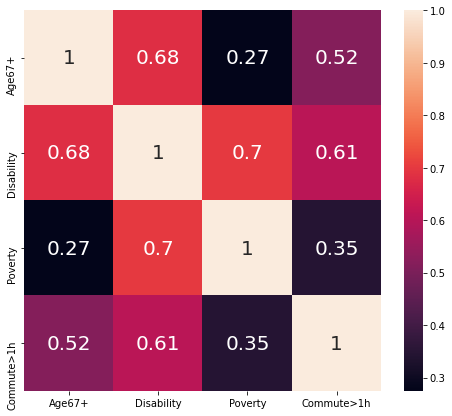

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = area_data[['ESTIMATE_1',
               'ESTIMATE_2', 
               'ESTIMATE_3',
               'ESTIMATE_4']]
d = d.rename(columns={"ESTIMATE_1": "Age67+", 
                      "ESTIMATE_2": "Disability", 
                      "ESTIMATE_3": "Poverty", 
                      "ESTIMATE_4": "Commute>1h", })

# d = d[["Age67+","Poverty","Commute>1h"]]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, annot_kws={"size": 20})


# Neighbors

In [70]:
###### neighbors

nei = pd.read_csv('nyc_nei.csv')
nei

,OBJECTID,src_FID,nbr_FID,LENGTH,NODE_COUNT
0,1,0,904,0.011039,0
1,2,0,1074,0.002317,0
2,3,0,1369,0.000454,0
3,4,0,1984,0.009105,0
4,5,0,1988,0.002301,0
...,...,...,...,...,...
13401,13402,2164,866,0.000000,1
13402,13403,2164,1076,0.000000,1
13403,13404,2164,2072,0.001632,0
13404,13405,2164,2073,0.000000,1


In [9]:
neighbors = dict()
for i in range(area_data.shape[0]):
    neighbors[i+1] = []
for iii in range(nei.shape[0]):
    if nei["LENGTH"][iii] > 0:
        a = neighbors[nei["src_FID"][iii]+1]
        a.append(nei["nbr_FID"][iii]+1)
        neighbors[nei["src_FID"][iii]+1] = a

        
neighbors[597] = [1165]
a = neighbors[1165]
a.append(597)
neighbors[1165] = a

neighbors[1471] = [2054]
a = neighbors[2054]
a.append(1471)
neighbors[2054] = a

neighbors[2001] = [1995]
a = neighbors[1995]
a.append(2001)
neighbors[1995] = a

In [31]:
neighbors

{1: [905, 1075, 1370, 1985, 1989],
 2: [641, 1506, 1507, 1827],
 3: [4, 1019, 1022, 1506],
 4: [3, 482, 604, 1020, 1021, 1160],
 5: [481, 846, 1023, 1813],
 6: [867, 1069, 1879, 2151],
 7: [782, 867, 1879, 1880, 2165],
 8: [9, 635, 1067, 1357, 1630],
 9: [8, 948, 1067, 1250, 1348],
 10: [571, 1243, 1357, 1831],
 11: [1260, 1261, 1508, 2095],
 12: [15, 1263, 1666, 1817, 2085, 2095],
 13: [30, 32, 561, 1088, 2082],
 14: [483, 1013, 1065, 1159, 1650, 2095],
 15: [12, 1475, 2085, 2095],
 16: [1304, 1338, 1339, 1543],
 17: [18, 1234, 1235, 1346, 1368],
 18: [17, 827, 1205, 1234, 1368],
 19: [622, 1668, 1677, 2162, 2163],
 20: [24, 1342, 1363, 1364, 1366],
 21: [22, 1342, 1361, 1684],
 22: [21, 26, 109, 475],
 23: [675, 1180, 1707, 1968],
 24: [20, 25, 109, 895, 1366],
 25: [24, 674, 832, 895],
 26: [22, 28, 474, 674],
 27: [621, 675, 817, 820, 835],
 28: [26, 46, 47, 474, 621, 832],
 29: [1360, 1367, 1440, 1747],
 30: [13, 31, 593, 1088, 1092],
 31: [30, 32, 594, 1186],
 32: [13, 31, 33, 11

# Preparing input of the model

In [10]:
A = []
for i in range(area_data.shape[0]):
    A.append(i+1)
    
data_1 = np.array(area_data['ESTIMATE_1'])
data_2 = np.array(area_data['ESTIMATE_3'])
data_3 = np.array(area_data['ESTIMATE_4'])

# mean_1 = np.mean(data_1)
# std_1 = np.std(data_1)
# data_1_norm = (data_1-mean_1)/std_1
# data_1 = data_1_norm

# mean_2 = np.mean(data_2)
# std_2 = np.std(data_2)
# data_2_norm = (data_2-mean_2)/std_2
# data_2 = data_2_norm

# mean_3 = np.mean(data_3)
# std_3 = np.std(data_3)
# data_3_norm = (data_3-mean_3)/std_3
# data_3 = data_3_norm

###############################

data_moe_1 = np.array(area_data['MOE_1'])
data_moe_2 = np.array(area_data['MOE_3'])
data_moe_3 = np.array(area_data['MOE_4'])

# data_moe_1 = data_moe_1/std_1
# data_moe_2 = data_moe_1/std_2
# data_moe_3 = data_moe_1/std_3

###############################


##vrt_1
vrt_col = []
for iii in range(80):
    name = "Var_Rep"+str(iii+1)+"_1"
    vrt_col.append(name)
vrt_col
vr_df = copy.deepcopy(area_data)
vr_df = vr_df[vrt_col]
data_vrt = vr_df.to_numpy()
data_vrt_1 = data_vrt.astype(float)

##vrt_2
vrt_col = []
for iii in range(80):
    name = "Var_Rep"+str(iii+1)+"_3"
    vrt_col.append(name)
vrt_col
vr_df = copy.deepcopy(area_data)
vr_df = vr_df[vrt_col]
data_vrt = vr_df.to_numpy()
data_vrt_2 = data_vrt.astype(float)

##vrt_3
vrt_col = []
for iii in range(80):
    name = "Var_Rep"+str(iii+1)+"_4"
    vrt_col.append(name)
vrt_col
vr_df = copy.deepcopy(area_data)
vr_df = vr_df[vrt_col]
data_vrt = vr_df.to_numpy()
data_vrt_3 = data_vrt.astype(float)


# data_vrt_1 = (data_vrt_1-mean_1)/std_1
# data_vrt_2 = (data_vrt_2-mean_2)/std_2
# data_vrt_3 = (data_vrt_3-mean_3)/std_3


data = {1: data_1,
       2: data_2,
       3: data_3}
data_vrt = {1: data_vrt_1,
           2: data_vrt_2,
           3: data_vrt_3}
data_moe = {1: data_moe_1,
           2: data_moe_2,
           3: data_moe_3}
count_data = {1: 1,
             2: 1,
             3: 1}

# p = P_feasi

In [11]:
area_data[['ESTIMATE_1','ESTIMATE_3','ESTIMATE_4']].describe()

,ESTIMATE_1,ESTIMATE_3,ESTIMATE_4
count,2165.000000,2165.000000,2165.000000
mean,486.204619,686.274365,478.106236
std,399.564336,683.024167,343.653247
min,0.000000,0.000000,0.000000
25%,257.000000,220.000000,251.000000
50%,390.000000,450.000000,418.000000
75%,587.000000,892.000000,632.000000
max,7129.000000,4383.000000,6133.000000


In [12]:
area_data[['MOE_1','MOE_3','MOE_4']].describe()

,MOE_1,MOE_3,MOE_4
count,2165.000000,2165.000000,2165.000000
mean,62.498718,263.302540,74.380977
std,38.543162,188.352205,45.379090
min,0.000000,3.000000,0.000000
25%,37.658101,123.000000,45.300247
50%,55.083249,217.000000,67.309700
75%,77.342984,360.000000,93.977878
max,442.575730,1105.000000,629.831596


# Importing packages

In [14]:
from zoning_functions_v4_2 import check_connection

from zoning_functions_v4_2 import GrowRegions_vr_multi
from zoning_functions_v4_2 import min_g_A

from zoning_functions_v4_2 import AssignEnclaves
from zoning_functions_v4_2 import select
from zoning_functions_v4_2 import intersection
from zoning_functions_v4_2 import min_g_R
from zoning_functions_v4_2 import region_share_border_area

from zoning_functions_v4_2 import H
from zoning_functions_v4_2 import H_np
from zoning_functions_v4_2 import p_reg_ind_gen

from zoning_functions_v4_2 import MOE_perc_region_VRT_multi

from zoning_functions_v4_2 import check_feasibility_vr_multi

from zoning_functions_v4_2 import neighbor_set_1swap_vr_multi
from zoning_functions_v4_2 import Tabu_search_vr_multi

from zoning_functions_v4_2 import GrowRegions_enclaveassign_example_vr_multi


# Region growing + Tabu search

Region grow...


/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:314: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc[iii] = MOE[iii]/m[iii]
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:314: RuntimeWarning: divide by zero encountered in true_divide
  MOE_perc[iii] = MOE[iii]/m[iii]
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

4388972.0 Number of regions: 572
-----
Number of partitions: 1
Tabu search...
 
Start from the Partition  0  from GrowRegion
$$$$$$$$$$$$$$$$$


/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Iteration 100
Current best:  4156125.0


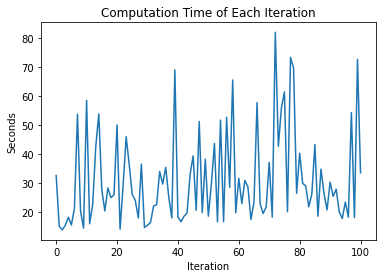

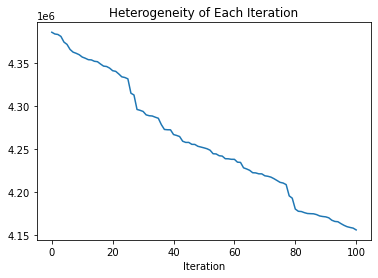

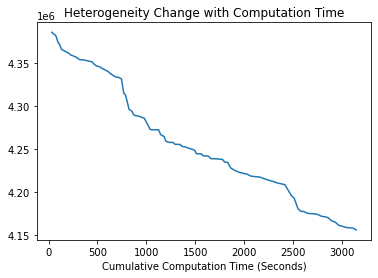

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Iteration 200
Current best:  3995313.0


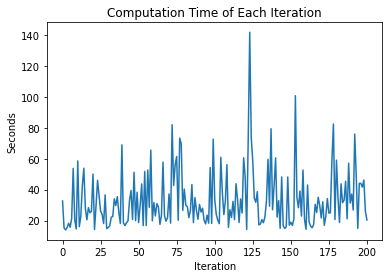

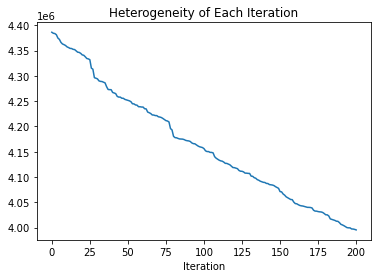

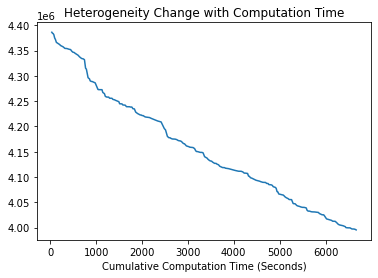

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 300
Current best:  3847542.0


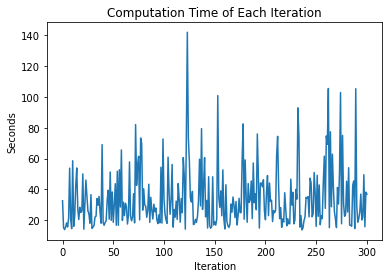

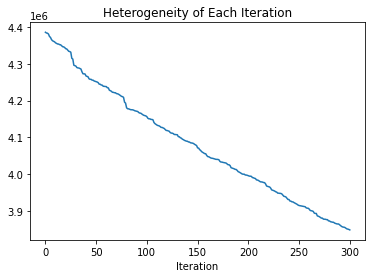

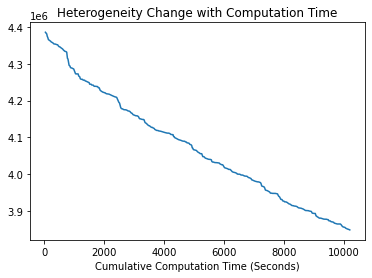

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 400
Current best:  3733983.0


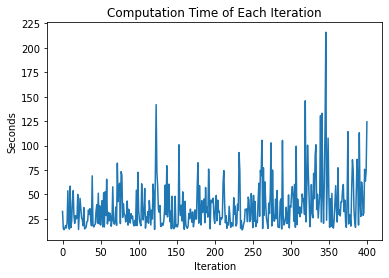

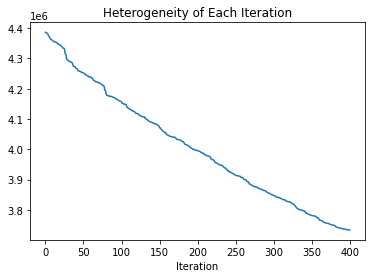

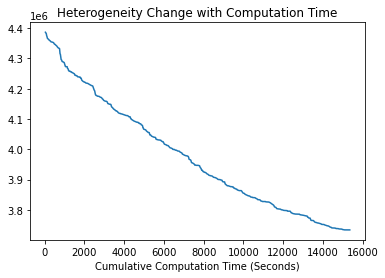

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 500
Current best:  3621788.0


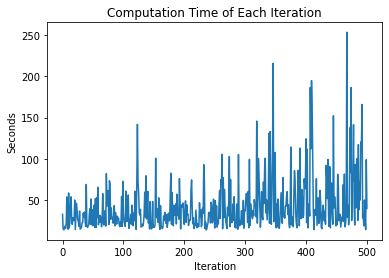

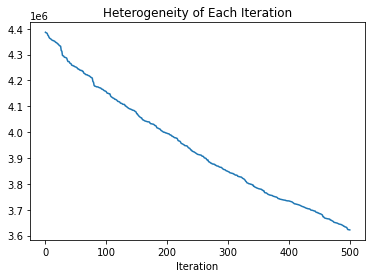

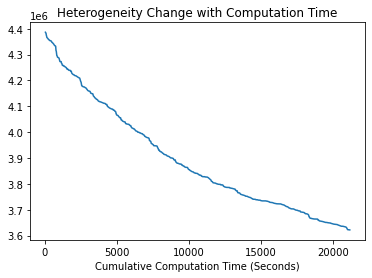

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 600
Current best:  3540140.0


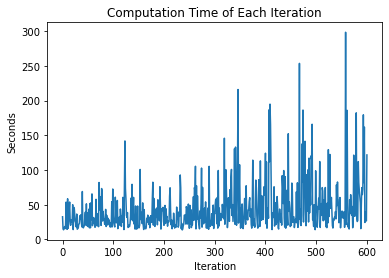

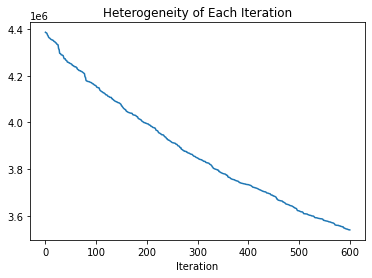

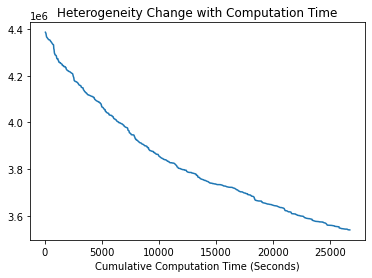

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 700
Current best:  3463282.0


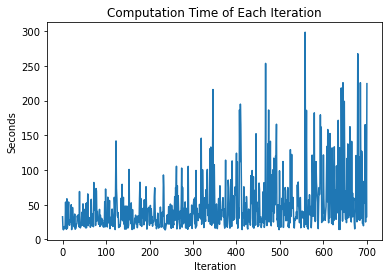

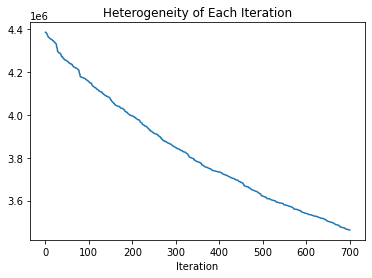

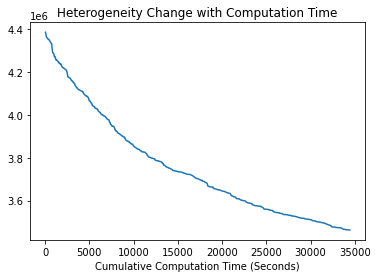

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 800
Current best:  3362863.0


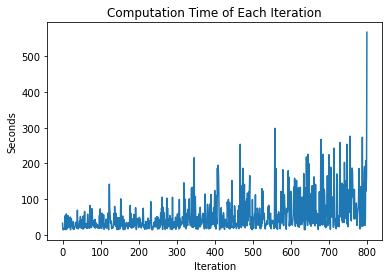

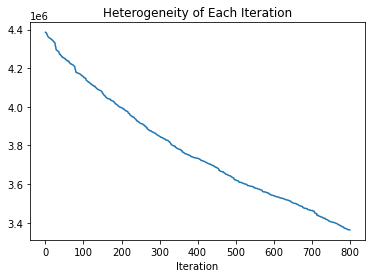

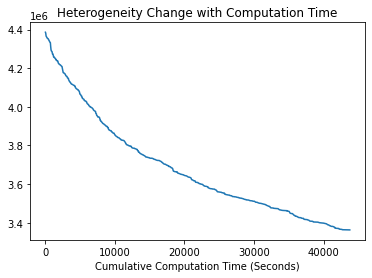

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 900
Current best:  3275439.0


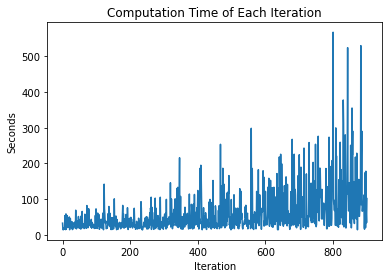

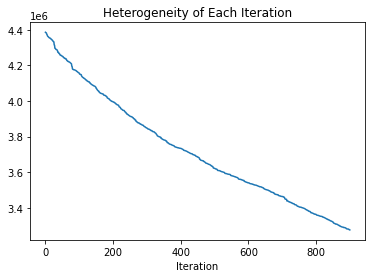

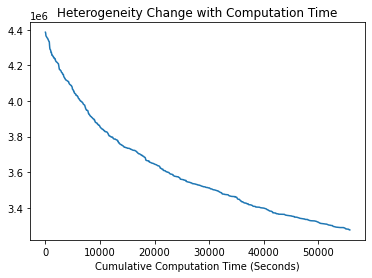

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 1000
Current best:  3207730.0


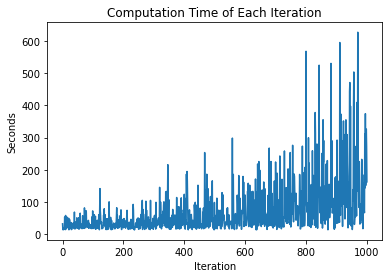

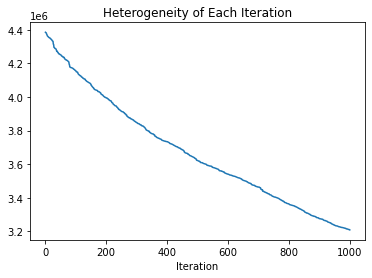

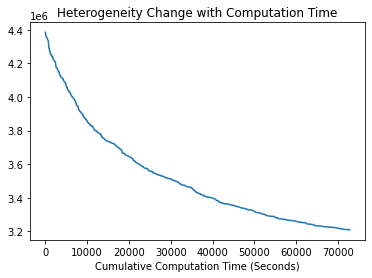

/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_


Iteration 1100
Current best:  3146840.0


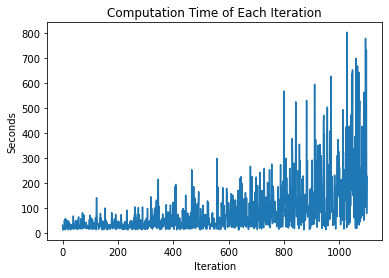

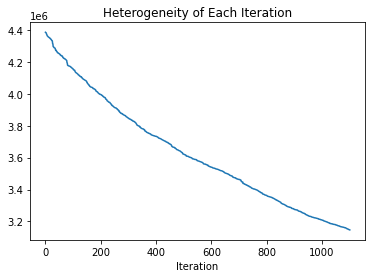

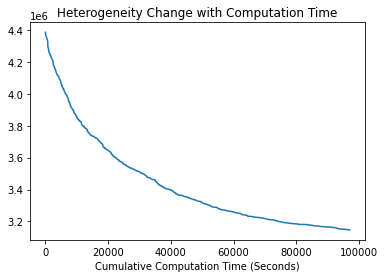

/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Iteration 1200
Current best:  3087081.0


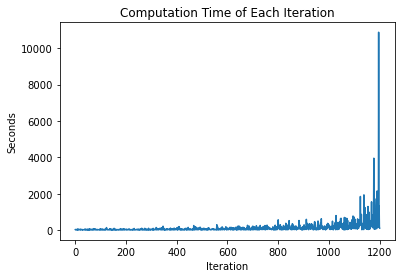

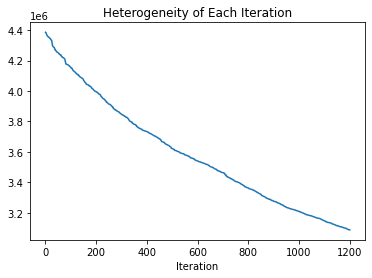

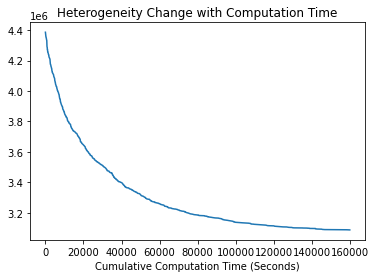

/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Iteration 1300
Current best:  3024806.0


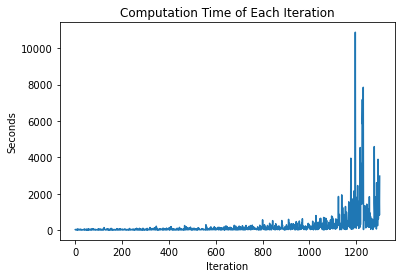

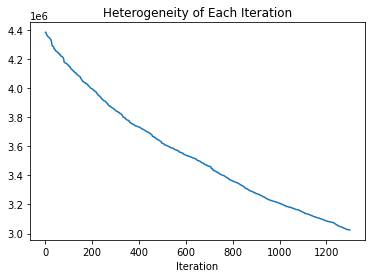

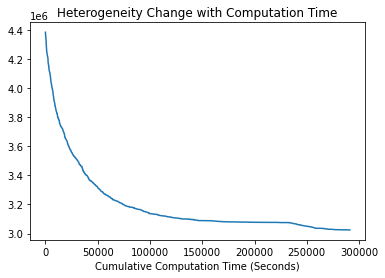

/Users/bingqing/Desktop/Research/Equity Evaluation - Data MDS/Variance Replicate Tables - Lower Man/zoning_functions_v4_2.py:276: RuntimeWarning: invalid value encountered in double_scalars
  MOE_perc_ = MOE_/m_
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bingqing/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
%%time

SWAP = 1
PRINT = 0
maxitr = 2
threshold = 0.15

tighter_param = 1

d = np.zeros((len(A),len(A)))
for iii in data:
    data_ = data[iii]
    d_ = np.zeros((len(A),len(A)))
    for i in range(len(A)):
        for j in range(i+1,len(A)):
            d_[i,j] = abs(data_[i] - data_[j])
    d += d_ 



print("Region grow...")
feasi_partitions, for_enclave_partitions_uni, e = GrowRegions_enclaveassign_example_vr_multi(maxitr, A,neighbors,data,d,data_vrt,data_moe,threshold,tighter_param, count_data,z,PRINT)
for kkk in feasi_partitions:
    print(H(kkk,A,d), "Number of regions:", len(feasi_partitions[0]))
print('-----')
print("Number of partitions:", len(feasi_partitions))
print("Tabu search...")
p_best_overall_1 = Tabu_search_vr_multi(1300, 1300, feasi_partitions, A, data,d, data_vrt, neighbors, SWAP, z, threshold, count_data, PRINT)
print("##################################")
print("##################################")
print("Final best H:", H(p_best_overall_1,A,d))
print("##################################")
print("##################################")
    
moe_perc = []
for reg in p_best_overall_1:
    m, MOE, MOE_perc = MOE_perc_region_VRT_multi(reg,A,data,data_vrt,count_data,z)
    for iii in data:
        if MOE_perc[iii] >= threshold:
            print(reg, iii, MOE_perc[iii]*100,"%")
        
        
print("##################################")




# Final districts

In [1]:
p_best_overall_1 = [[30, 31, 32],
 [42],
 [58, 60, 61, 56],
 [80],
 [93, 94, 95],
 [102, 104, 106, 100, 59],
 [96, 97, 99, 90],
 [129, 131, 114],
 [143, 142],
 [150, 138],
 [134, 136, 133, 132, 193],
 [147],
 [163, 169, 141, 149, 145],
 [191, 130, 128, 188, 187, 192],
 [164, 165, 167, 168, 170, 171, 172, 173, 179],
 [674, 26, 25, 28],
 [66, 67, 640, 70],
 [233, 234, 232, 231, 239],
 [55, 722, 111, 110],
 [17, 18, 827],
 [226, 235, 236, 469],
 [291, 294, 297, 289],
 [831, 47, 46],
 [116, 117, 723],
 [127, 115, 918, 124],
 [8, 635],
 [48, 54, 863],
 [317, 318, 337, 316],
 [474, 475, 22],
 [330, 331, 332],
 [4, 481, 482, 1020, 3, 5],
 [895, 24, 109],
 [237, 238, 569],
 [68, 69, 71, 73, 77, 1749],
 [204, 205, 203, 812],
 [702, 885, 159, 156, 155, 157, 151, 710, 152],
 [499, 225],
 [82, 718, 197, 199, 632],
 [144, 146, 148, 1046],
 [241, 247, 249, 887, 242],
 [52, 53, 51, 834, 50, 1309],
 [288, 290, 613],
 [101, 103, 995],
 [403, 404, 406],
 [227, 228, 945, 220],
 [176, 177, 178, 180, 630, 631, 924],
 [413, 415],
 [256, 591],
 [302, 304, 305, 301, 925],
 [88, 92, 830, 770],
 [299, 527, 528],
 [76, 564, 719],
 [112, 113, 598, 1006],
 [89, 91, 1193],
 [311, 480, 548, 553],
 [210, 211, 212, 816, 940],
 [401, 756, 399, 400],
 [215, 216, 217, 1126, 198, 1548, 213, 218],
 [462, 487, 651, 267, 633],
 [135, 813, 814, 600, 139],
 [352, 607, 608, 606, 340],
 [502, 503, 504],
 [63, 1738, 107, 105],
 [338, 339, 872, 468],
 [335, 512, 590, 586],
 [333, 767, 559, 558, 314],
 [34, 658, 828],
 [221, 222, 223, 224, 1659],
 [536, 537, 439, 534],
 [458, 459, 460, 693],
 [125, 79, 1032, 842],
 [243, 244, 1103],
 [535],
 [422, 423, 424, 429, 465, 735, 871],
 [363, 601, 602, 777, 366],
 [368, 507, 760, 522, 762, 367],
 [258, 742, 1042, 262, 743, 261],
 [407, 848, 408],
 [417, 418, 421, 1106, 412],
 [248, 1194, 245],
 [436, 699],
 [45, 833, 832],
 [81, 83, 85, 1495, 968, 717],
 [575],
 [425, 505, 695, 682],
 [703, 704, 325],
 [549, 935, 253],
 [38, 40, 1758, 484],
 [391, 393, 996, 390, 389, 392, 1481, 397, 398],
 [200, 939, 988, 207],
 [584, 589, 585],
 [370, 556, 1050, 371],
 [274, 276, 1341, 497],
 [678, 694, 336, 692],
 [266, 269, 1273],
 [1004, 279, 526],
 [257, 1016, 546],
 [621, 817, 820, 27, 823],
 [1057, 126, 688],
 [303, 636, 966],
 [1483, 372, 344, 345],
 [383, 673, 853],
 [638],
 [260, 1035, 259, 1017],
 [293, 454, 921, 298, 1279],
 [386, 387, 464, 1387],
 [43, 485, 1457],
 [530, 576, 455, 909, 851],
 [186, 189, 1622, 185, 190, 1621],
 [714, 728, 647, 623, 622],
 [774, 295, 296, 292, 1252, 1093],
 [306, 310, 1424, 886, 450],
 [355, 1679, 334, 347],
 [140, 280, 320, 1729, 929],
 [14, 483, 1065, 1159],
 [419, 1102, 524],
 [20, 1364],
 [914, 1086, 78],
 [697],
 [123, 803, 840, 1031],
 [628, 900, 376, 899],
 [365, 663, 664, 837, 1325, 361],
 [358, 1221, 362, 364, 1220],
 [350, 351, 1434],
 [378, 380, 1492, 377, 1598, 385, 379],
 [713],
 [86, 1343],
 [322, 326, 865, 1736, 323, 734],
 [721],
 [471, 500, 552, 1363],
 [182, 1479, 1068, 181],
 [209, 971, 1010],
 [13, 1088, 1092],
 [341, 680, 1537, 373],
 [672, 795],
 [736, 737],
 [715, 862, 642],
 [521, 959],
 [121, 122, 957, 563, 1951],
 [498, 1222, 517],
 [108, 1600, 578, 720],
 [753, 754],
 [922, 923, 285, 911],
 [410, 991, 880],
 [416, 763, 1110],
 [725, 726, 843],
 [477, 1055],
 [438, 441, 506, 1681],
 [619, 869, 1496, 84],
 [1953, 183, 175],
 [761, 1291, 272],
 [420, 431, 746, 1503],
 [676, 741, 920],
 [160, 161, 711, 2055, 158, 2056, 162],
 [196, 801, 599, 1532],
 [785, 788],
 [794, 1721, 315, 319],
 [39, 667, 941, 1514],
 [846, 740],
 [1181, 1180, 23],
 [629, 738, 937, 938, 750],
 [62, 915, 1426],
 [541, 616, 542, 1289, 1051],
 [359, 1333, 384, 360, 1581, 847],
 [273, 731, 1292, 1262, 1041, 270],
 [806, 1200, 1201, 41],
 [685, 1191, 566, 822],
 [453, 1070, 1290, 456],
 [388, 394, 396, 1588, 1596, 555],
 [860, 1090, 518],
 [489, 815, 987, 1634, 202],
 [342, 343, 348, 1613, 1482],
 [983, 562, 1819, 520, 246],
 [382, 896, 381, 1645],
 [501, 648, 1330],
 [449, 1003, 1422, 451],
 [595, 675, 824, 594, 593, 1707],
 [730, 1173, 1174, 268],
 [627, 1660, 206, 870],
 [650, 1239, 894, 587],
 [19, 1668],
 [617, 787, 1136],
 [255, 1272, 1287, 573],
 [645, 1027, 1299, 427],
 [538, 539, 1886, 440],
 [496, 529, 1195, 1188],
 [321, 656, 775, 928, 1033, 1491],
 [700, 1036],
 [877, 878, 879],
 [597, 1165],
 [1311, 1312, 626, 961, 219],
 [6, 519, 1069, 1976, 867],
 [35, 36, 1734, 1759],
 [1, 905, 1611, 1075],
 [10, 1243, 709, 1630],
 [327, 461, 1663, 1172],
 [282, 283, 2155],
 [21, 1361, 1342],
 [1384, 435],
 [624, 625, 1602, 1911, 137, 577],
 [854, 1751, 411, 1018, 531],
 [12, 1817],
 [950, 986, 1635, 201, 802],
 [605, 653, 786, 982, 1108, 1389],
 [883, 965],
 [807, 849, 933, 1118],
 [250, 516, 944, 2027],
 [1373, 960, 275, 1134],
 [432, 666, 1712],
 [669, 781, 805, 1215, 1214],
 [284, 490, 1340, 525, 2048],
 [9, 1348, 1357, 1067],
 [946, 947, 949],
 [452, 855, 1544],
 [804, 488, 194, 1636, 1640],
 [612, 614, 974, 975, 494, 913, 912, 2154],
 [470, 724, 1318, 1319],
 [1011, 1657, 208],
 [581, 818, 819, 821, 1756],
 [1416, 510],
 [1030, 1376, 1377, 1378, 312, 313],
 [57, 1494, 1876, 639, 64, 1719],
 [568, 1145, 677, 1257, 1230],
 [349, 463, 1648, 1453],
 [1723, 433, 779],
 [264, 265, 1388, 1570, 1437],
 [907, 1066],
 [790, 1192],
 [661, 1327],
 [184, 811, 1988],
 [33, 561, 1695, 1718],
 [428, 1297, 1298],
 [565, 1186, 1717, 579],
 [286, 1629, 1772, 838, 540],
 [981, 1047],
 [858, 1101, 1095],
 [670, 852, 1541],
 [523, 1519],
 [120, 1529, 1775, 1530, 154],
 [278, 1202, 1589],
 [1305, 1477, 254, 1056],
 [324, 1735],
 [560, 705, 1827],
 [662, 1459, 1460, 550],
 [1281, 1282, 1283, 300],
 [1072, 1007],
 [881, 882, 1944, 457],
 [1005, 1074, 1044],
 [963, 1236, 953, 1023],
 [748, 1037, 1038, 1362],
 [1048, 1049],
 [603, 1637, 1638, 357, 1700, 369],
 [932, 1321, 902],
 [634, 873, 1644, 1643, 467],
 [1053, 1054],
 [426, 430, 1127, 1405, 1890],
 [328, 759, 1467, 1669],
 [926, 1190],
 [671, 729, 1417, 1423],
 [49, 495, 1849, 1850],
 [1064, 1062, 1063],
 [307, 1642, 1811, 493],
 [999, 1008, 1187],
 [769, 1647, 778],
 [739, 936, 1429, 1430, 1778, 119],
 [967, 1130, 1131],
 [251, 252, 2158, 1671],
 [976, 1012, 1079, 1269],
 [271, 1943, 611, 1513],
 [780, 901, 1583, 1883, 277],
 [1198, 1199, 859],
 [72, 75, 1760, 1762, 1761],
 [98, 1431, 1737],
 [287, 1603, 1888, 580],
 [997, 1089, 1183],
 [582, 1610],
 [356, 1726, 1217],
 [442, 1785, 1789, 395],
 [1685, 1684, 476, 836, 835],
 [955, 1231, 956, 1226, 1167],
 [1043, 1025, 1577, 609, 1294],
 [1120, 1203, 1015],
 [1371, 1372, 1478, 230],
 [1485, 1060, 798],
 [856, 857, 1112, 1111, 1646],
 [1149, 1084],
 [652, 1328, 1846, 644],
 [532, 665, 2157],
 [1609, 409, 567, 1892],
 [768, 904, 1687],
 [513, 547, 1710, 1715],
 [44, 1746, 1747, 2063, 37],
 [478, 479, 620, 1767, 1766, 1658],
 [1383, 1612, 402],
 [511, 972, 2049, 1284, 864],
 [1138, 544, 1727, 1139],
 [1308, 1797, 712, 118, 1757],
 [898, 1382],
 [446, 509, 747, 1094, 1564, 1565, 2067],
 [583, 784, 1614, 1615],
 [766, 434, 1702, 1703],
 [1353, 1354, 1462, 437],
 [687, 1617],
 [797, 1115, 1116, 1594],
 [2, 641, 1506, 1507, 2125],
 [195, 1639, 1641],
 [1916, 166, 1935, 1608, 174],
 [655, 1676],
 [1169],
 [472, 1303, 2028, 875],
 [1413, 1510, 592],
 [1178, 1179],
 [657, 752, 1347, 1981],
 [1142, 1815, 604],
 [1680, 707, 1682, 684],
 [15, 1475, 2085],
 [551, 1100, 1932],
 [1151, 1917, 515],
 [970, 1418, 1196],
 [1024, 1285, 1286],
 [696, 1701],
 [1288, 1109],
 [1543, 2038, 16],
 [1406, 1258, 1402, 733],
 [346, 1623, 1631],
 [1618, 1619, 375],
 [557, 791, 1768, 2078, 792, 1238],
 [1661, 749],
 [615, 1465, 1553, 1554, 844],
 [978, 979, 1350, 1524],
 [443, 1240, 1575, 1574],
 [1135, 751, 1739],
 [1076, 1276, 1277],
 [1407, 1408, 732, 1300],
 [1213],
 [1237, 1268, 1783, 570],
 [444, 1563, 1790, 1073],
 [308, 309, 2131, 2132],
 [1983, 1212, 1087, 618],
 [414, 1450, 1458, 1310, 1498],
 [1316, 1317, 1045],
 [572, 1557, 1558],
 [1113, 1123, 1157, 1158, 1597],
 [808, 809, 980, 1743, 1809],
 [473, 934, 1604, 1937],
 [1152, 1322, 1323, 1153],
 [240, 1662, 1841],
 [545, 2165, 2073, 229],
 [708, 1059, 1998],
 [1205, 1234, 1235, 1346],
 [1255, 1080, 1259, 1141, 1540],
 [1774, 1210, 1147, 1209, 951],
 [892, 1627],
 [1155, 1313, 1314],
 [1295, 1229],
 [466, 1380, 1415, 1568, 1505],
 [1265, 1266, 1271],
 [893, 1401, 1511],
 [689, 2139, 984],
 [1001, 1154, 1800, 1831, 571],
 [829, 2086, 2087, 917, 916, 796],
 [1605, 942],
 [1278, 1274, 1275, 1177, 1392],
 [890, 1672],
 [1085, 1926, 2042, 74],
 [1161, 1896, 789],
 [1522, 2160, 839, 610],
 [948, 958, 1345, 1884],
 [755, 1898, 891, 1468, 1412],
 [910, 1585, 1369, 1270, 1000, 1586],
 [1688, 1689, 654, 1125],
 [1331, 1332, 1207],
 [1128, 783, 1963],
 [1206, 1241, 1306, 1484, 1324, 1204],
 [2080, 2099, 845, 153],
 [447, 1572, 1573, 1591],
 [646, 1956],
 [919, 930, 2058],
 [1052, 1802, 1071],
 [1391, 1390, 1148],
 [1397, 1399, 1137],
 [1189, 1435],
 [405, 1750, 1745, 1810, 850],
 [1798, 841],
 [826, 1442, 1699],
 [1244, 1403],
 [1499, 1616, 679, 1500],
 [1869, 1871, 491, 1909, 486],
 [1421, 1463, 1464, 973],
 [353, 354, 1731, 1732, 1906, 1907],
 [772, 1961, 1260],
 [1653, 1449, 908],
 [1021, 1022, 1160, 2148],
 [1225, 1280, 1525],
 [1476, 1039, 1521],
 [1655, 668, 771, 1665, 1970],
 [514, 1396, 1549, 1934],
 [776, 1119, 1334, 1651, 1905],
 [1582, 1599, 897],
 [1697, 1162, 1725, 1096, 1143],
 [810, 1545, 1551, 1561],
 [993, 1555, 1556],
 [952, 1082, 1083, 1859, 1769, 1765, 1078],
 [1107, 1385, 1386, 1606],
 [1786, 964],
 [448, 990, 1595, 1903, 1904, 1901, 906],
 [1933, 825],
 [660, 1730, 1919, 1986, 329, 1624, 1414],
 [888, 1587, 1531, 1533],
 [29, 1440, 2061, 2062, 1360, 1368],
 [1704, 1705, 1711, 445],
 [1394],
 [1395, 1393],
 [1590, 1753, 1752, 492],
 [1398],
 [1480, 1560, 1559, 994],
 [1253, 1254, 1794, 1296],
 [1156, 1175, 1870],
 [757, 1820, 1625],
 [1411],
 [1247, 1248, 1335, 1349, 1881],
 [65, 1497, 1854, 1858, 1927, 1929, 758],
 [2126, 706],
 [263, 1251, 1542, 2047, 1982],
 [1374, 1375, 1233, 1787, 1320],
 [1359, 1447, 1448],
 [637, 1501, 2118],
 [554, 1708, 1709, 1706],
 [1014, 1835],
 [903, 1686, 1693],
 [1197, 1654, 1441],
 [691, 1326, 1438, 1837, 1840, 2002, 889],
 [7, 1879, 1880, 1977],
 [1099, 1473, 1742],
 [1304, 1339, 1486, 1338, 2037, 1164],
 [1489, 1490, 1358],
 [1034, 1182, 2122],
 [1232, 1964, 1146],
 [698, 1061, 1942, 2091],
 [1899, 998],
 [1365, 1366, 1367, 1698],
 [1454, 1410, 1488],
 [1356, 1992, 1104, 1351],
 [1208, 1580, 1576],
 [1455],
 [1456],
 [744, 1518, 2116],
 [690, 1404, 2092, 1058, 2083],
 [1593, 1851, 1852, 574],
 [1129, 1536, 1741],
 [2103, 1163, 1144],
 [543, 1211, 2012, 2138, 1469, 1470],
 [1993, 1105, 1445, 1355],
 [1097, 1170, 2161],
 [866, 1722, 1843],
 [1249, 1250, 1579, 1864],
 [793, 1836, 1847],
 [992, 1427, 1428, 2051, 2050, 1026],
 [681, 1692, 1806, 1807],
 [659, 1223, 1781, 1960, 1878],
 [1694, 2082, 727],
 [716, 1748, 1792, 1793, 2115, 861],
 [1451, 1628, 1452],
 [1546, 1887, 1895, 596, 1547, 1592],
 [989, 1122, 1966, 1967],
 [1946, 1947, 643],
 [1228, 1526, 1527, 1779],
 [1940, 87, 1941, 2098],
 [1264, 1650, 1013, 2141],
 [1538, 1974, 1975, 1400, 1245, 1267, 1227],
 [1520],
 [281, 2076, 2077, 1649],
 [1140, 1246, 1958, 1962, 1329],
 [1218, 1263, 1816, 1818],
 [1293, 1773],
 [2119, 2120, 773, 1121],
 [1474, 2100, 2101, 2084, 1302, 876, 799],
 [1242, 1939, 1436],
 [943, 1425, 2121, 1696],
 [1432, 1973, 1261],
 [1872, 2029, 765],
 [1176, 1307, 1744, 1997],
 [1081, 1771, 1839],
 [1439, 1504, 1512, 1803],
 [1185, 1955],
 [1098, 1256, 1801, 2145],
 [1893, 1894, 649, 1865],
 [11, 1666, 2095, 2140, 2144, 1508, 1509],
 [2105, 2114, 1740, 374],
 [533, 1584, 1844, 1845, 1578, 2128],
 [1133, 1813, 1814],
 [1569, 1720, 1724, 2071, 2072, 1379, 508, 1673],
 [1823, 1824, 1132],
 [1124, 1821, 1848],
 [2011, 1832, 954],
 [1029, 1842, 1928],
 [1150, 1990, 1670],
 [1900, 1910, 1009],
 [1535, 1979, 1534, 1409],
 [782, 1828, 1829, 2074],
 [1216, 1796, 1822, 1795, 1515],
 [701, 2096, 2097],
 [1552, 1562, 1784],
 [1184, 2088],
 [1754, 1755, 1433],
 [1028, 1833, 1834, 1902],
 [1632, 1633, 2065, 2066, 874],
 [1539, 1780, 1945, 1782, 1224],
 [1965, 1959, 1040],
 [686, 2142, 2143],
 [931, 1523, 1921, 1922, 2000],
 [2094, 2110, 985, 2059, 1171, 1620],
 [927, 1873, 1856, 1860, 1885],
 [1999, 2039, 2040, 884, 1444],
 [1952, 1950, 1166],
 [1690, 1691],
 [1566, 1805, 1567, 1978, 1571],
 [1002, 2075, 2079, 1874, 1875, 1370],
 [1713, 1714, 1716],
 [1853, 1528, 1764],
 [1091, 1923, 1924, 1925],
 [2151, 1077, 2052, 1770, 1863, 1352, 1763],
 [1117, 2112, 2113, 1550],
 [1443, 1493, 1861, 2111],
 [2008, 1461],
 [1336, 1838, 2034],
 [745, 2068, 2070, 2069],
 [1419, 1868, 2130, 1337, 1957],
 [1420, 1626, 1867, 2129, 1472, 1980],
 [2033, 1466],
 [1733, 1791, 1728],
 [1601, 1912],
 [1918, 2057, 1301],
 [1674, 1675, 1938],
 [1936, 1607],
 [1776, 1777],
 [1656, 1948, 2007, 1502],
 [2146, 2147, 1019, 1826],
 [1168, 2015, 1915, 1913, 1914],
 [977, 1889, 2022, 2023, 2024],
 [1652, 1808, 1908],
 [1664, 1667, 1677, 1971, 1972],
 [1219, 1984, 1987, 1991],
 [1799, 1804, 1830],
 [1381, 1855, 1897, 1989, 1985],
 [2117, 1487, 1891, 1517, 2123],
 [1788, 1968, 1969, 1683],
 [1114, 2093, 2106, 2102],
 [1857],
 [1995, 1996, 2001, 1446],
 [1471, 2054, 2064],
 [1344, 2124, 2133],
 [1315, 2164, 2081, 2156],
 [1930, 1931],
 [1812, 2090],
 [1866, 2046],
 [2044, 2045, 1825],
 [2009, 1949],
 [2017, 2030, 2031, 1877],
 [1994],
 [1678, 2162, 2163],
 [1954, 2053],
 [2127, 1882],
 [2016, 2004, 2014, 2013, 2026],
 [2136, 2137, 2152, 2153, 1516],
 [2020, 2025, 2041],
 [2035, 2036, 2043],
 [2003, 2006, 2019, 2134],
 [2104, 2108, 1862, 2107, 2109],
 [2032, 2089],
 [2135, 2018, 2021, 2150, 2010, 2149],
 [2159, 2005],
 [588, 969, 800, 683],
 [1920, 2060, 962, 868, 214, 764]]

<ipython-input-2-cd25671fcc0e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_gpd["zoning"][0] = len(P_best)
<ipython-input-2-cd25671fcc0e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_gpd['zoning'][j-1] = i
<ipython-input-2-cd25671fcc0e>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_gpd["x"] = area_gpd.centroid.map(lambda p: p.x)
<ipython-input-2-cd25671fcc0e>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect.

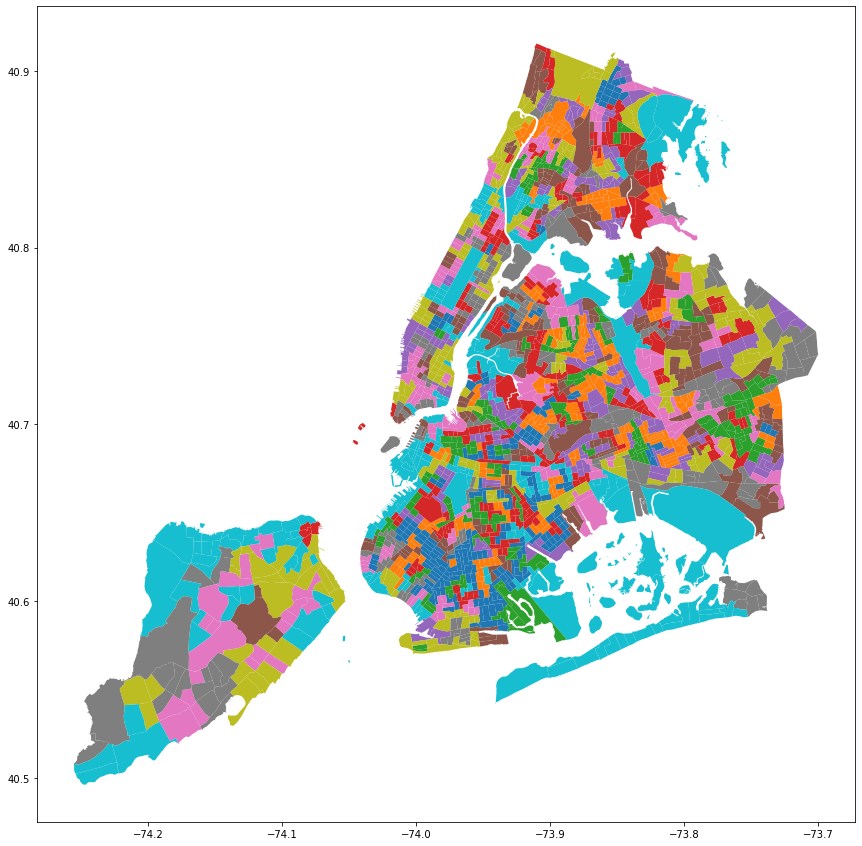

In [2]:
import geopandas as gpd
P_best = p_best_overall_1

area_gpd = gpd.read_file('2010 Census Tracts/geo_export_3587ea98-2925-456b-a389-ecb51ad1a719.shp')
area_gpd

area_gpd["zoning"] = 0
area_gpd["zoning"][0] = len(P_best)
for i in range(len(P_best)):
    for j in P_best[i]:
        area_gpd['zoning'][j-1] = i
area_gpd['zoning'] = area_gpd['zoning'].astype('object')

area_gpd["x"] = area_gpd.centroid.map(lambda p: p.x)
area_gpd["y"] = area_gpd.centroid.map(lambda p: p.y)


# print(H(P_best,A,d))
ax = area_gpd.plot(figsize = (15,15),column = "zoning")



# plt.title("Zoning 6 ("+ str(len(P_best)) + " zones, H = "+ str(H(P_best,A,d)) + ")")

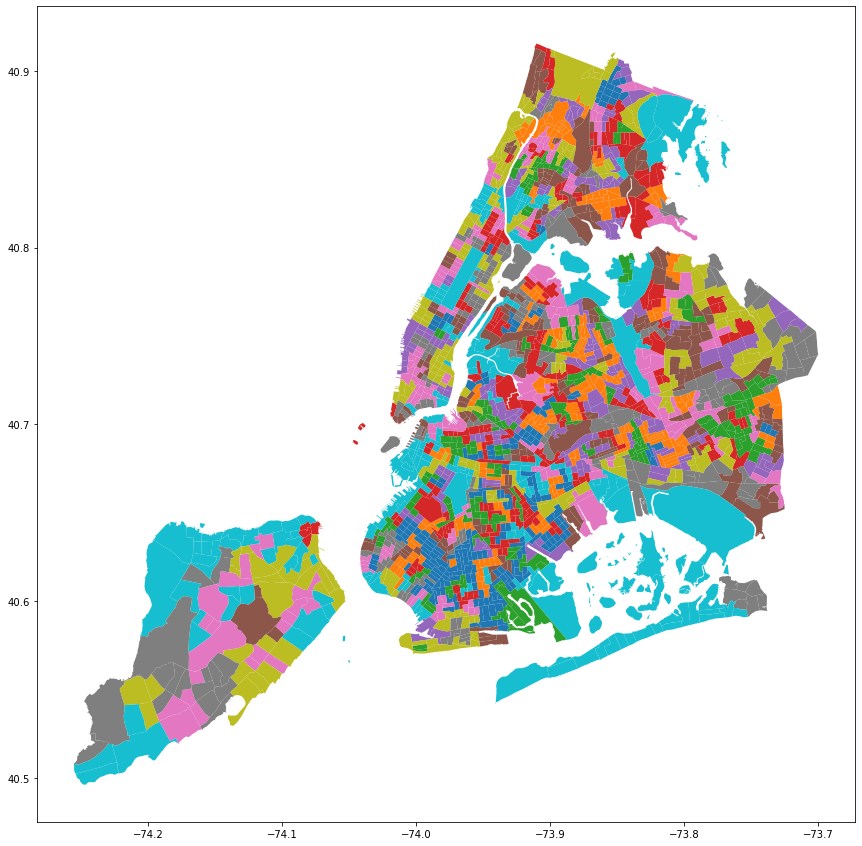

In [81]:
# area_gpd.plot(figsize = (15,15),column = "zoning")
area_gpd.to_file("equitable_zoning_new.shp")